# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [18]:
df.keys()

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
       'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
       'churn', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_j

In [20]:
len(df)

14606

In [25]:
df = pd.read_csv('./data_for_predictions.csv').set_index("id")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
id,,,,,,,,,,,,,,,,,,,,,
24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


In [26]:
df.shape

(14606, 62)

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

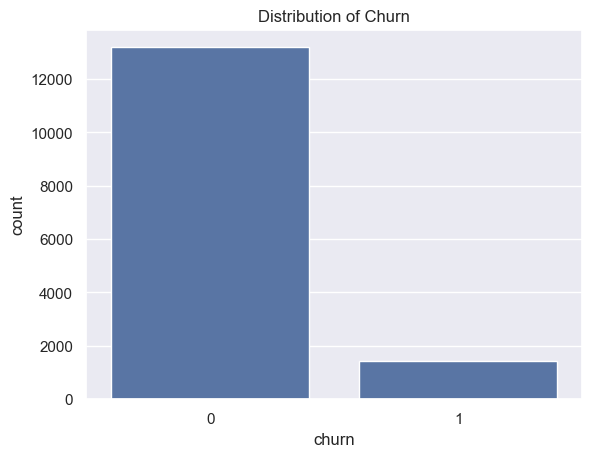

In [8]:
# Plot the distribution of the target variable 'churn'
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()


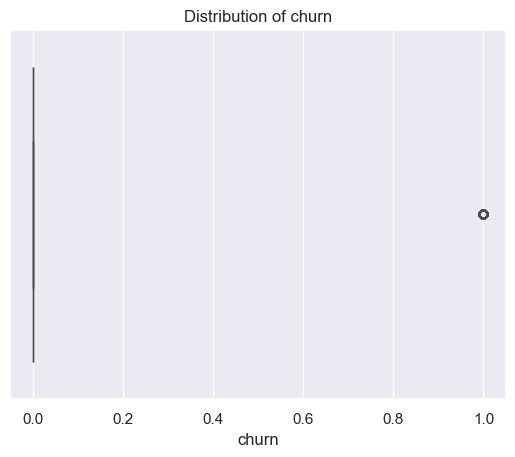

In [29]:
# Create boxplot
sns.boxplot(x="churn", data=df)
plt.title("Distribution of churn")
plt.show()

In [34]:
df["forecast_price_pow_off_peak"].describe()

count    14606.000000
mean        43.130056
std          4.485988
min          0.000000
25%         40.606701
50%         44.311378
75%         44.311378
max         59.266378
Name: forecast_price_pow_off_peak, dtype: float64

Text(0.5, 1.0, 'Distribution of POA/count')

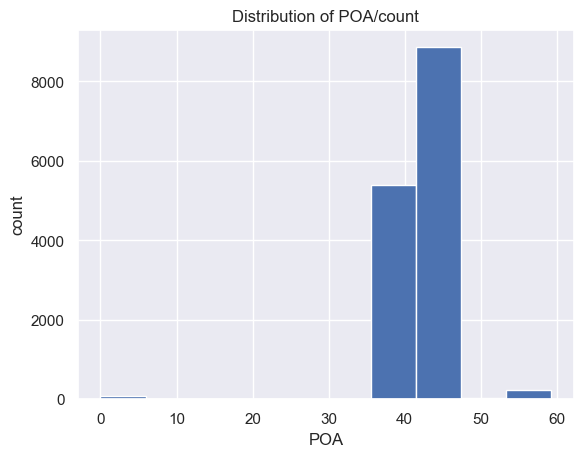

In [36]:
# Plot a histogram of 'forecast_price_pow_off_peak'	
df["forecast_price_pow_off_peak"].hist()
plt.xlabel("POA")
plt.ylabel("count")
plt.title("Distribution of POA/count")

In [38]:
q1, q9 = df["forecast_price_pow_off_peak"].quantile([0.1, 0.9])
mask = df["forecast_price_pow_off_peak"].between(q1, q9)
mask.head()

id
24011ae4ebbe3035111d65fa7c15bc57    True
d29c2c54acc38ff3c0614d0a653813dd    True
764c75f661154dac3a6c254cd082ea7d    True
bba03439a292a1e166f80264c16191cb    True
149d57cf92fc41cf94415803a877cb4b    True
Name: forecast_price_pow_off_peak, dtype: bool

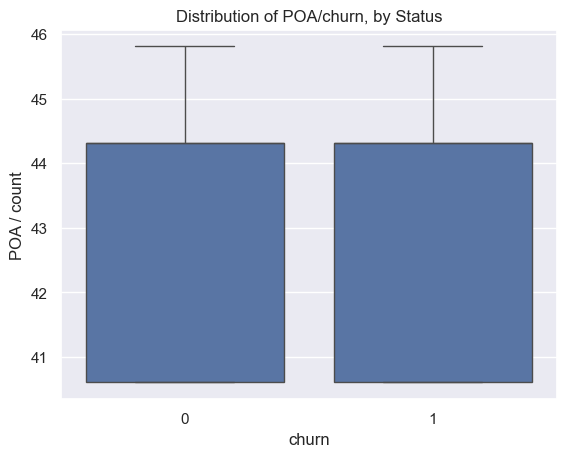

In [40]:
# Create clipped boxplot
q1, q9 = df["forecast_price_pow_off_peak"].quantile([0.1, 0.9])
mask = df["forecast_price_pow_off_peak"].between(q1, q9)
sns.boxplot(x="churn", y="forecast_price_pow_off_peak", data=df[mask])
plt.xlabel("churn")
plt.ylabel("POA / count")
plt.title("Distribution of POA/churn, by Status");

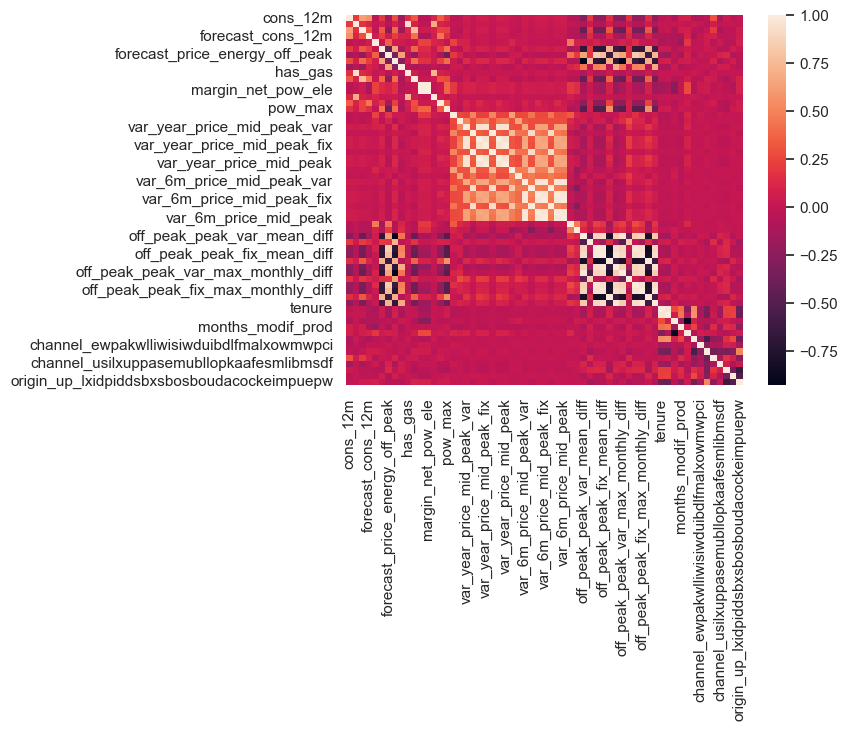

In [51]:
corr = df.drop(columns="churn").corr()
sns.heatmap(corr);

In [42]:
target = "churn"
x = df.drop(columns=[target])
y = df[target]

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (14606, 61)
y shape: (14606,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10954, 61)
y_train shape: (10954,)
X_test shape: (3652, 61)
y_test shape: (3652,)


In [47]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [48]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(2106, 61)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
1899,5.246220,5.137186,4.383277,3.301236,0.0,2.164918,0.116910,0.100572,40.606701,1,...,52,4,0,0,1,0,0,0,0,1
2346,5.608438,0.000000,4.522861,2.833912,0.0,2.121855,0.116910,0.100572,40.606701,0,...,67,7,0,0,0,1,0,1,0,0
7108,4.950861,0.000000,4.146004,4.029618,0.0,1.234770,0.163868,0.085224,44.311378,0,...,3,1,0,0,1,0,0,0,0,1
9348,3.883321,4.283799,2.950365,3.060471,0.0,1.287130,0.145884,0.000000,44.311378,1,...,32,8,0,0,1,0,0,0,0,1
11592,4.261025,0.000000,3.585235,3.423582,0.0,1.261025,0.142065,0.000000,44.311378,0,...,19,7,0,0,1,0,0,0,0,1


In [58]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(19802, 61)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,3.934296,0.000000,2.946452,3.021049,0.0,1.280578,0.167086,0.088444,45.308378,0,...,27,3,0,0,1,0,0,0,0,1
1,4.539791,0.000000,3.175222,2.571453,0.0,1.224792,0.146694,0.000000,44.311378,0,...,45,9,0,0,1,0,0,0,0,1
2,4.549959,3.759592,3.450095,3.539975,0.0,2.117139,0.115761,0.099419,40.606701,1,...,8,7,0,0,1,0,0,0,0,1
3,3.770410,0.000000,0.000000,2.885599,0.0,1.229938,0.168242,0.089602,45.308378,0,...,38,2,0,0,1,0,0,0,1,0
4,3.785259,0.000000,0.000000,2.961848,0.0,1.779885,0.145711,0.000000,44.311378,0,...,53,4,0,0,0,0,1,1,0,0


In [49]:
y_train_under.value_counts(normalize=True)

churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [52]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9039


In [14]:
# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])

# Add model training in here!
model = RandomForestClassifier() # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier()

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Generate predictions here!
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [60]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8319
Training Accuracy: 0.6618
Test Accuracy: 0.5613
Training Accuracy: 1.0
Test Accuracy: 0.8423


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

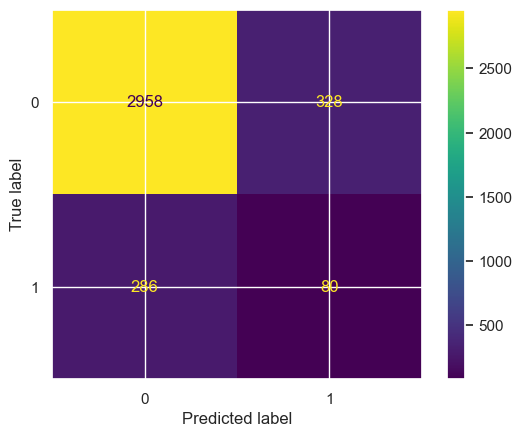

In [63]:
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test)

In [64]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

39


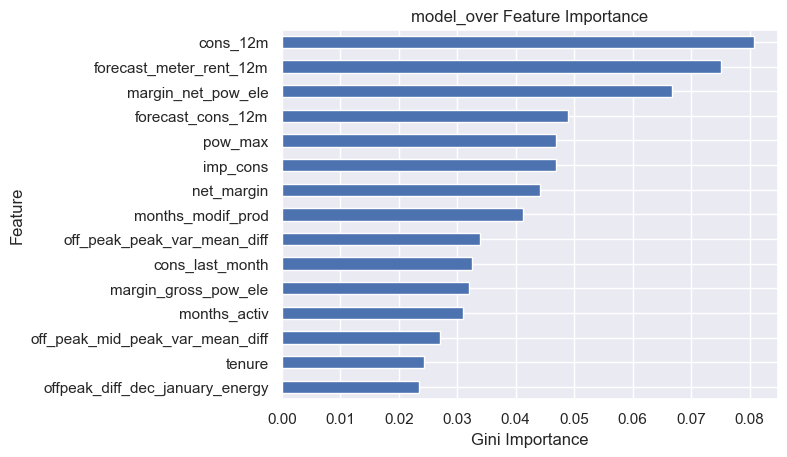

In [65]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [66]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.904709748083242
Precision: 0.9090909090909091
Recall: 0.0546448087431694
F1 Score: 0.10309278350515463


In [67]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [69]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [70]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99141631 0.99116385 0.99444444 0.99242424 0.99166667]


In [71]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [72]:
model = GridSearchCV(
    clf, 
    params, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [73]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [74]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.420007,0.201750,0.083990,0.025464,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.862408,0.844484,0.845202,0.861364,0.860101,0.854712,0.008094,23
1,3.999900,0.472226,0.073533,0.018445,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.862408,0.844484,0.845202,0.861364,0.860101,0.854712,0.008094,23
2,7.911996,0.848375,0.125620,0.033936,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.866953,0.850795,0.853030,0.864394,0.856061,0.858247,0.006342,21
3,7.962809,1.448620,0.199729,0.088833,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.866953,0.850795,0.853030,0.864394,0.856061,0.858247,0.006342,21
4,12.347266,0.431003,0.369870,0.282933,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876546,0.858874,0.850000,0.865404,0.855808,0.861326,0.009089,19
5,12.890450,0.541583,0.225876,0.064336,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876546,0.858874,0.850000,0.865404,0.855808,0.861326,0.009089,19
6,6.936562,1.118150,0.180968,0.082917,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.980056,0.985610,0.982323,0.980051,0.985101,0.982628,0.002382,17
7,6.444187,1.204967,0.115128,0.036018,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.980056,0.985610,0.982323,0.980051,0.985101,0.982628,0.002382,17
8,12.095076,0.983109,0.336335,0.289310,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985357,0.985105,0.987374,0.981566,0.987626,0.985406,0.002175,15
9,13.648918,1.629544,0.222626,0.092708,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985357,0.985105,0.987374,0.981566,0.987626,0.985406,0.002175,15


In [75]:
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.420007,0.201750,0.083990,0.025464,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.862408,0.844484,0.845202,0.861364,0.860101,0.854712,0.008094,23
1,3.999900,0.472226,0.073533,0.018445,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.862408,0.844484,0.845202,0.861364,0.860101,0.854712,0.008094,23
2,7.911996,0.848375,0.125620,0.033936,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.866953,0.850795,0.853030,0.864394,0.856061,0.858247,0.006342,21
3,7.962809,1.448620,0.199729,0.088833,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.866953,0.850795,0.853030,0.864394,0.856061,0.858247,0.006342,21
4,12.347266,0.431003,0.369870,0.282933,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876546,0.858874,0.850000,0.865404,0.855808,0.861326,0.009089,19
5,12.890450,0.541583,0.225876,0.064336,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876546,0.858874,0.850000,0.865404,0.855808,0.861326,0.009089,19


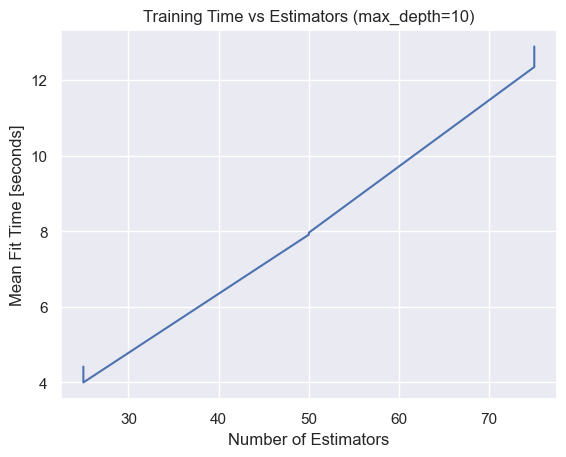

In [76]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [77]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,4.420007,10,mean
1,3.999900,10,median
2,7.911996,10,mean
3,7.962809,10,median
4,12.347266,10,mean
5,12.890450,10,median


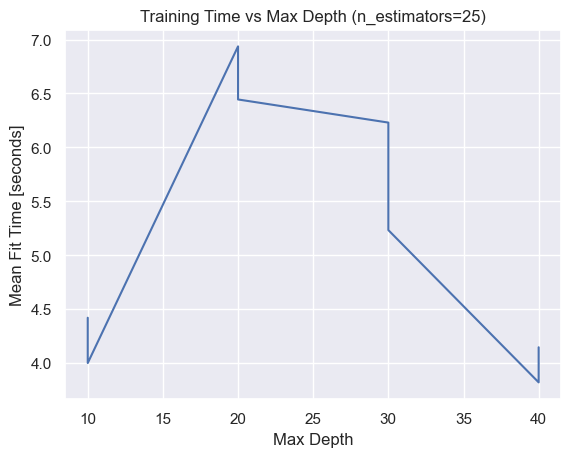

In [78]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [79]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,4.420007,10,mean
1,3.999900,10,median
6,6.936562,20,mean
7,6.444187,20,median
12,6.229790,30,mean
13,5.232783,30,median
18,3.820570,40,mean
19,4.146002,40,median


In [80]:
# Extract best hyperparameters
model.predict(X_train_over)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)